# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: YYYY/0X
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [177]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [178]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [179]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [180]:
language = [['fga-eps-mds-2022-1-schedula-gerenciador_de_localidades', 'py'],
            ['fga-eps-mds-2022-1-schedula-gestor_de_usuarios', 'py'],
            ['fga-eps-mds-2022-1-schedula-detalhador_de_chamados', 'py'],
            ['fga-eps-mds-2022-1-schedula-front', 'ts'],
        ]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

### SonarCloud

##### Path to the folder with all your jsons

In [181]:
jsons = glob('./analytics-raw-data/*.json') # add your path here

In [182]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()
    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)
        
        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2022-1-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)
    print(aux_df)
    df['repository'] = aux_df[2]

    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [183]:
base_component_df = create_base_component_df(jsons)

   0         1                       2   3                 4      5 6
0     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
1     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
2     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
3     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
4     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
5     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
6     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
7     schedula  detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
8     schedula                   front  14  08-2022-08-57-08  1.0.0  
9     schedula                   front  14  08-2022-08-57-08  1.0.0  
10    schedula                   front  14  08-2022-08-57-08  1.0.0  
11    schedula                   front  14  08-2022-08-57-08  1.0.0  
12    schedula                   front  14  08-2022-08-57-08  1.0.0  
13    schedula      

C:\Users\samue\AppData\Local\Temp\ipykernel_12908\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component

In [184]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
0,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
1,functions,34,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
2,security_rating,1.0,True,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
3,files,21,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
4,complexity,44,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
5,ncloc,969,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
6,coverage,87.6,False,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
7,comment_lines_density,6.5,False,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
8,duplicated_lines_density,11.6,False,fga-eps-mds-2022-1-schedula-front-14-08-2022-0...,front,1.0.0
9,functions,162,NaN,fga-eps-mds-2022-1-schedula-front-14-08-2022-0...,front,1.0.0


#### Create dataframe per file

In [185]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [186]:
import re


def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_name = os.path.basename(i)

        file_repository = re.split(r'-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json', file_name)[0]

        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = file_language)

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json", expand=True)

    df['repository'] = aux_df[0]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [187]:
file_component_df = create_file_df(jsons)
file_component_df.repository.unique()

C:\Users\samue\AppData\Local\Temp\ipykernel_12908\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_12908\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component

array(['fga-eps-mds-2022-1-schedula-detalhador_de_chamados',
       'fga-eps-mds-2022-1-schedula-front',
       'fga-eps-mds-2022-1-schedula-gestor_de_usuarios'], dtype=object)

#### Removing NaN

In [188]:
file_component_df = file_component_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

#### Create dataframe per repository

In [189]:
# Example

repo1_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-detalhador_de_chamados']
repo2_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-front']
repo3_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-gestor_de_usuarios']


In [190]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [191]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [192]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [193]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [194]:
def m4(df):

    passed_tests = df['test_success_density'].astype(float).median() / 100

    return passed_tests

##### Fast test builds

In [195]:
def m5(df):

    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

##### Test coverage

In [196]:
def m6(df):

    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [197]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m3(version_df))
        m5_list.append(m3(version_df))
        m6_list.append(m3(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m3_list,
                               'm5': m3_list,
                               'm6': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [198]:
repo1_metrics = create_metrics_df(repo1_df)
repo2_metrics = create_metrics_df(repo2_df)
repo3_metrics = create_metrics_df(repo3_df)
...

Ellipsis

### Data visualization

- You must do this for each of your repositories

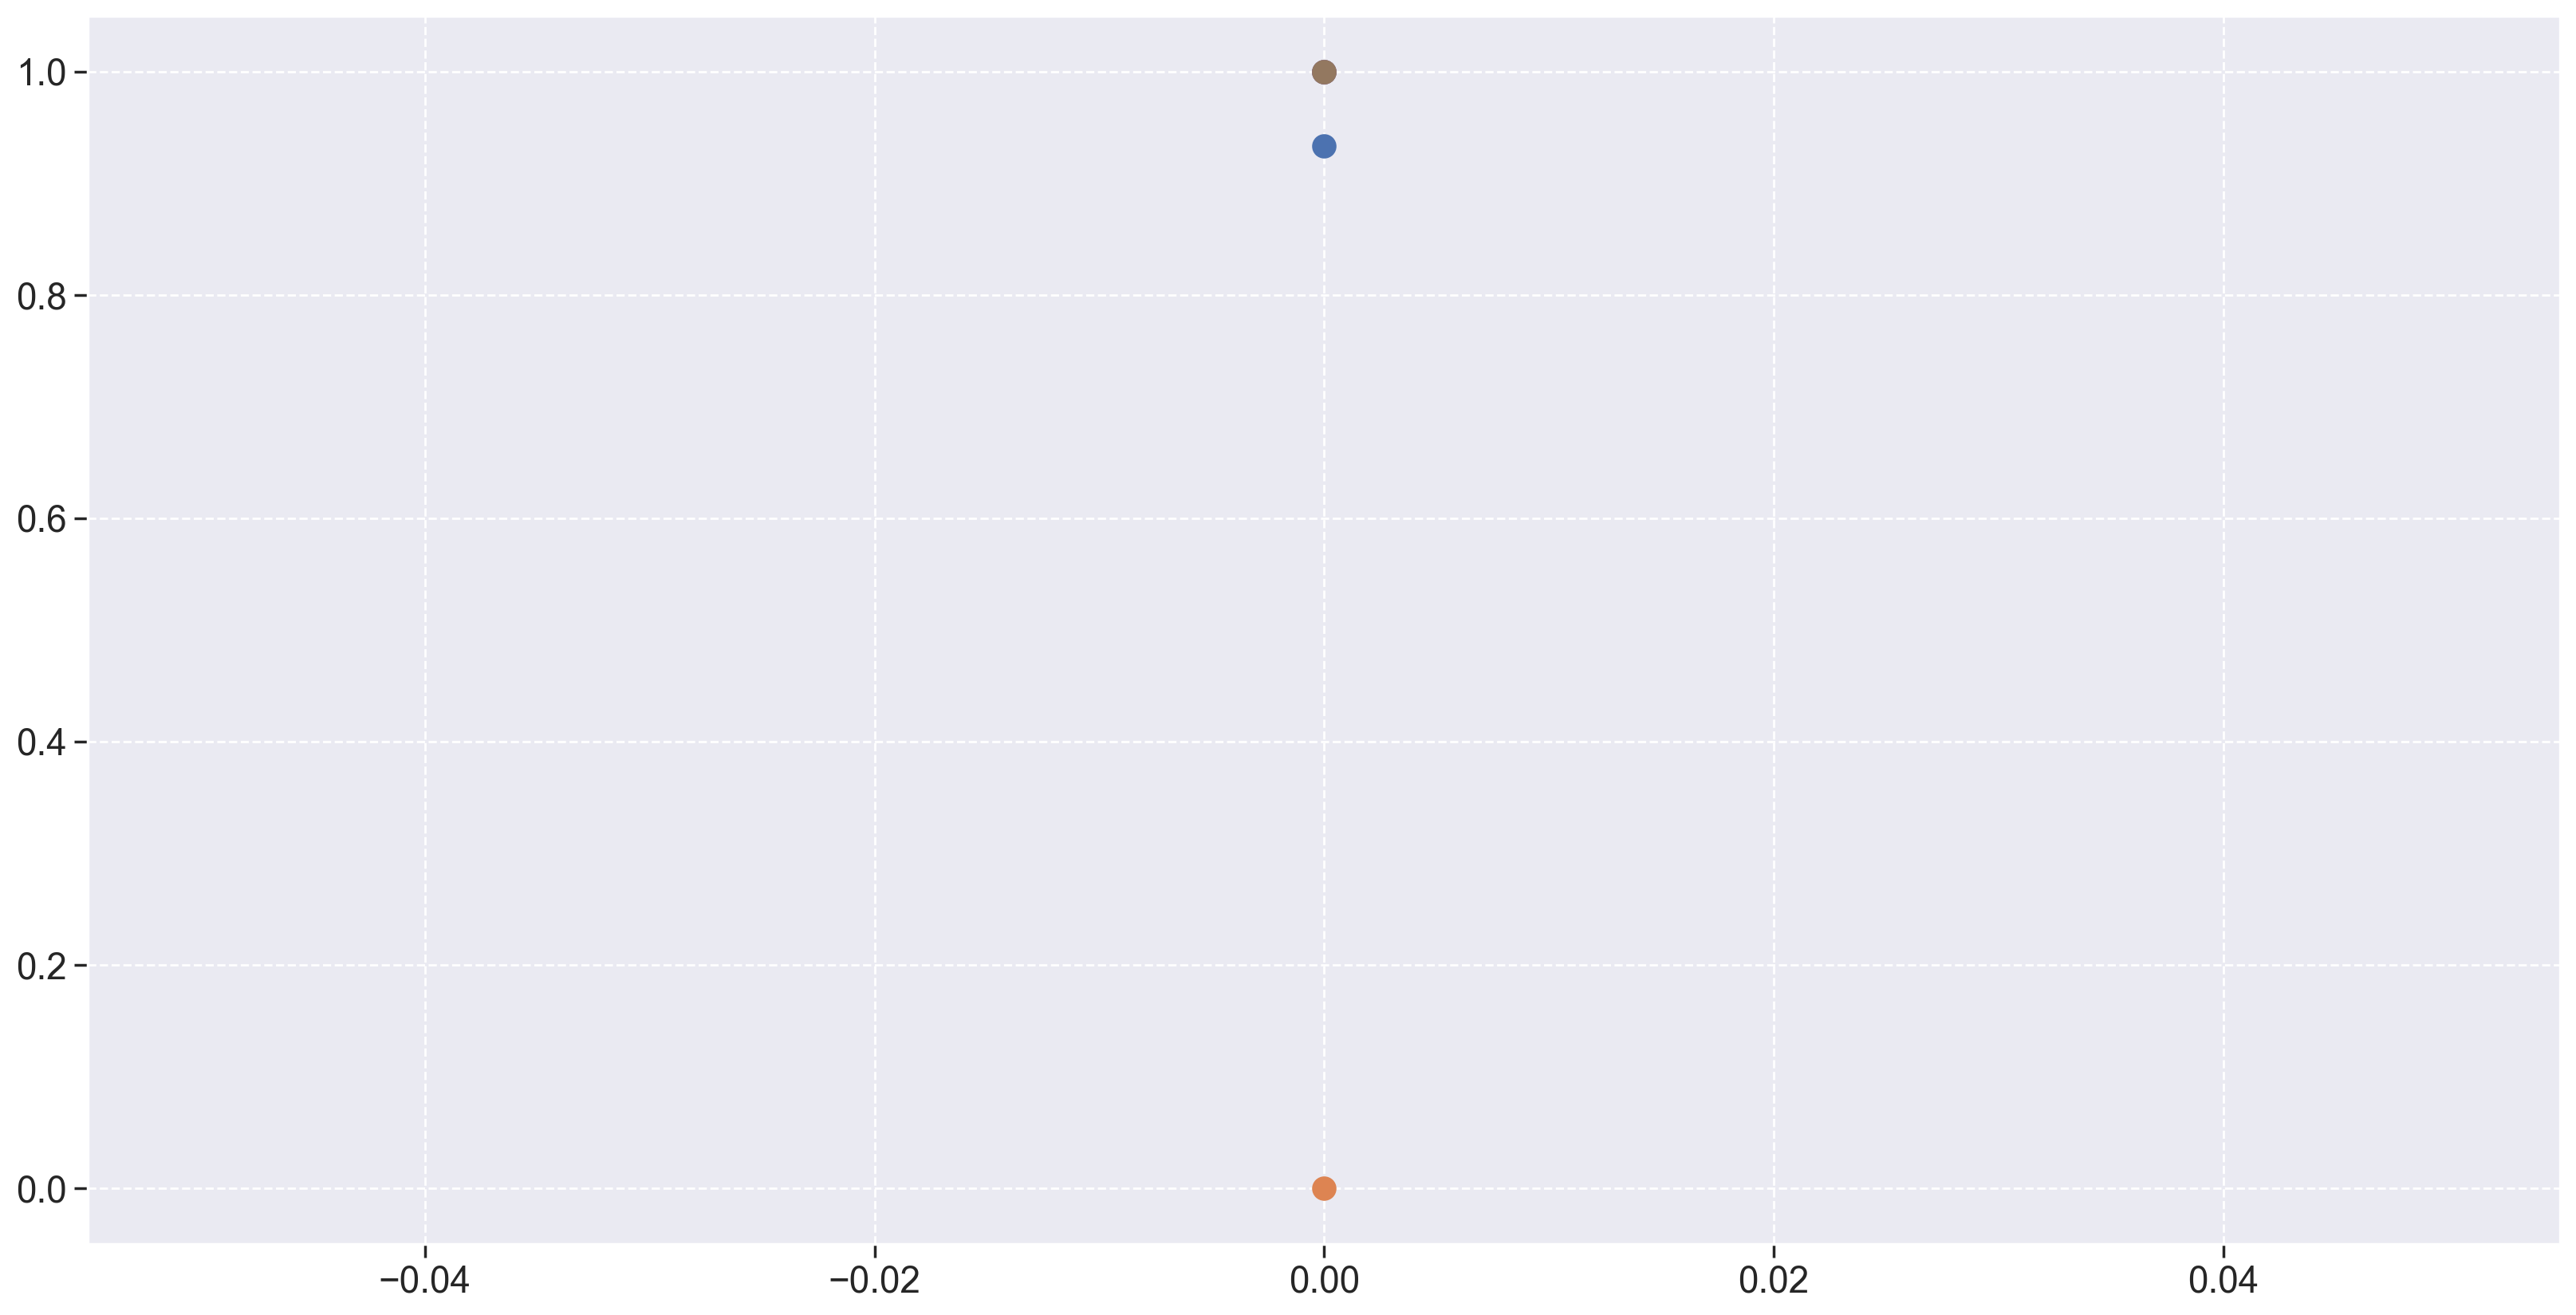

In [199]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m6'], linewidth=3, marker='o', markersize=10)



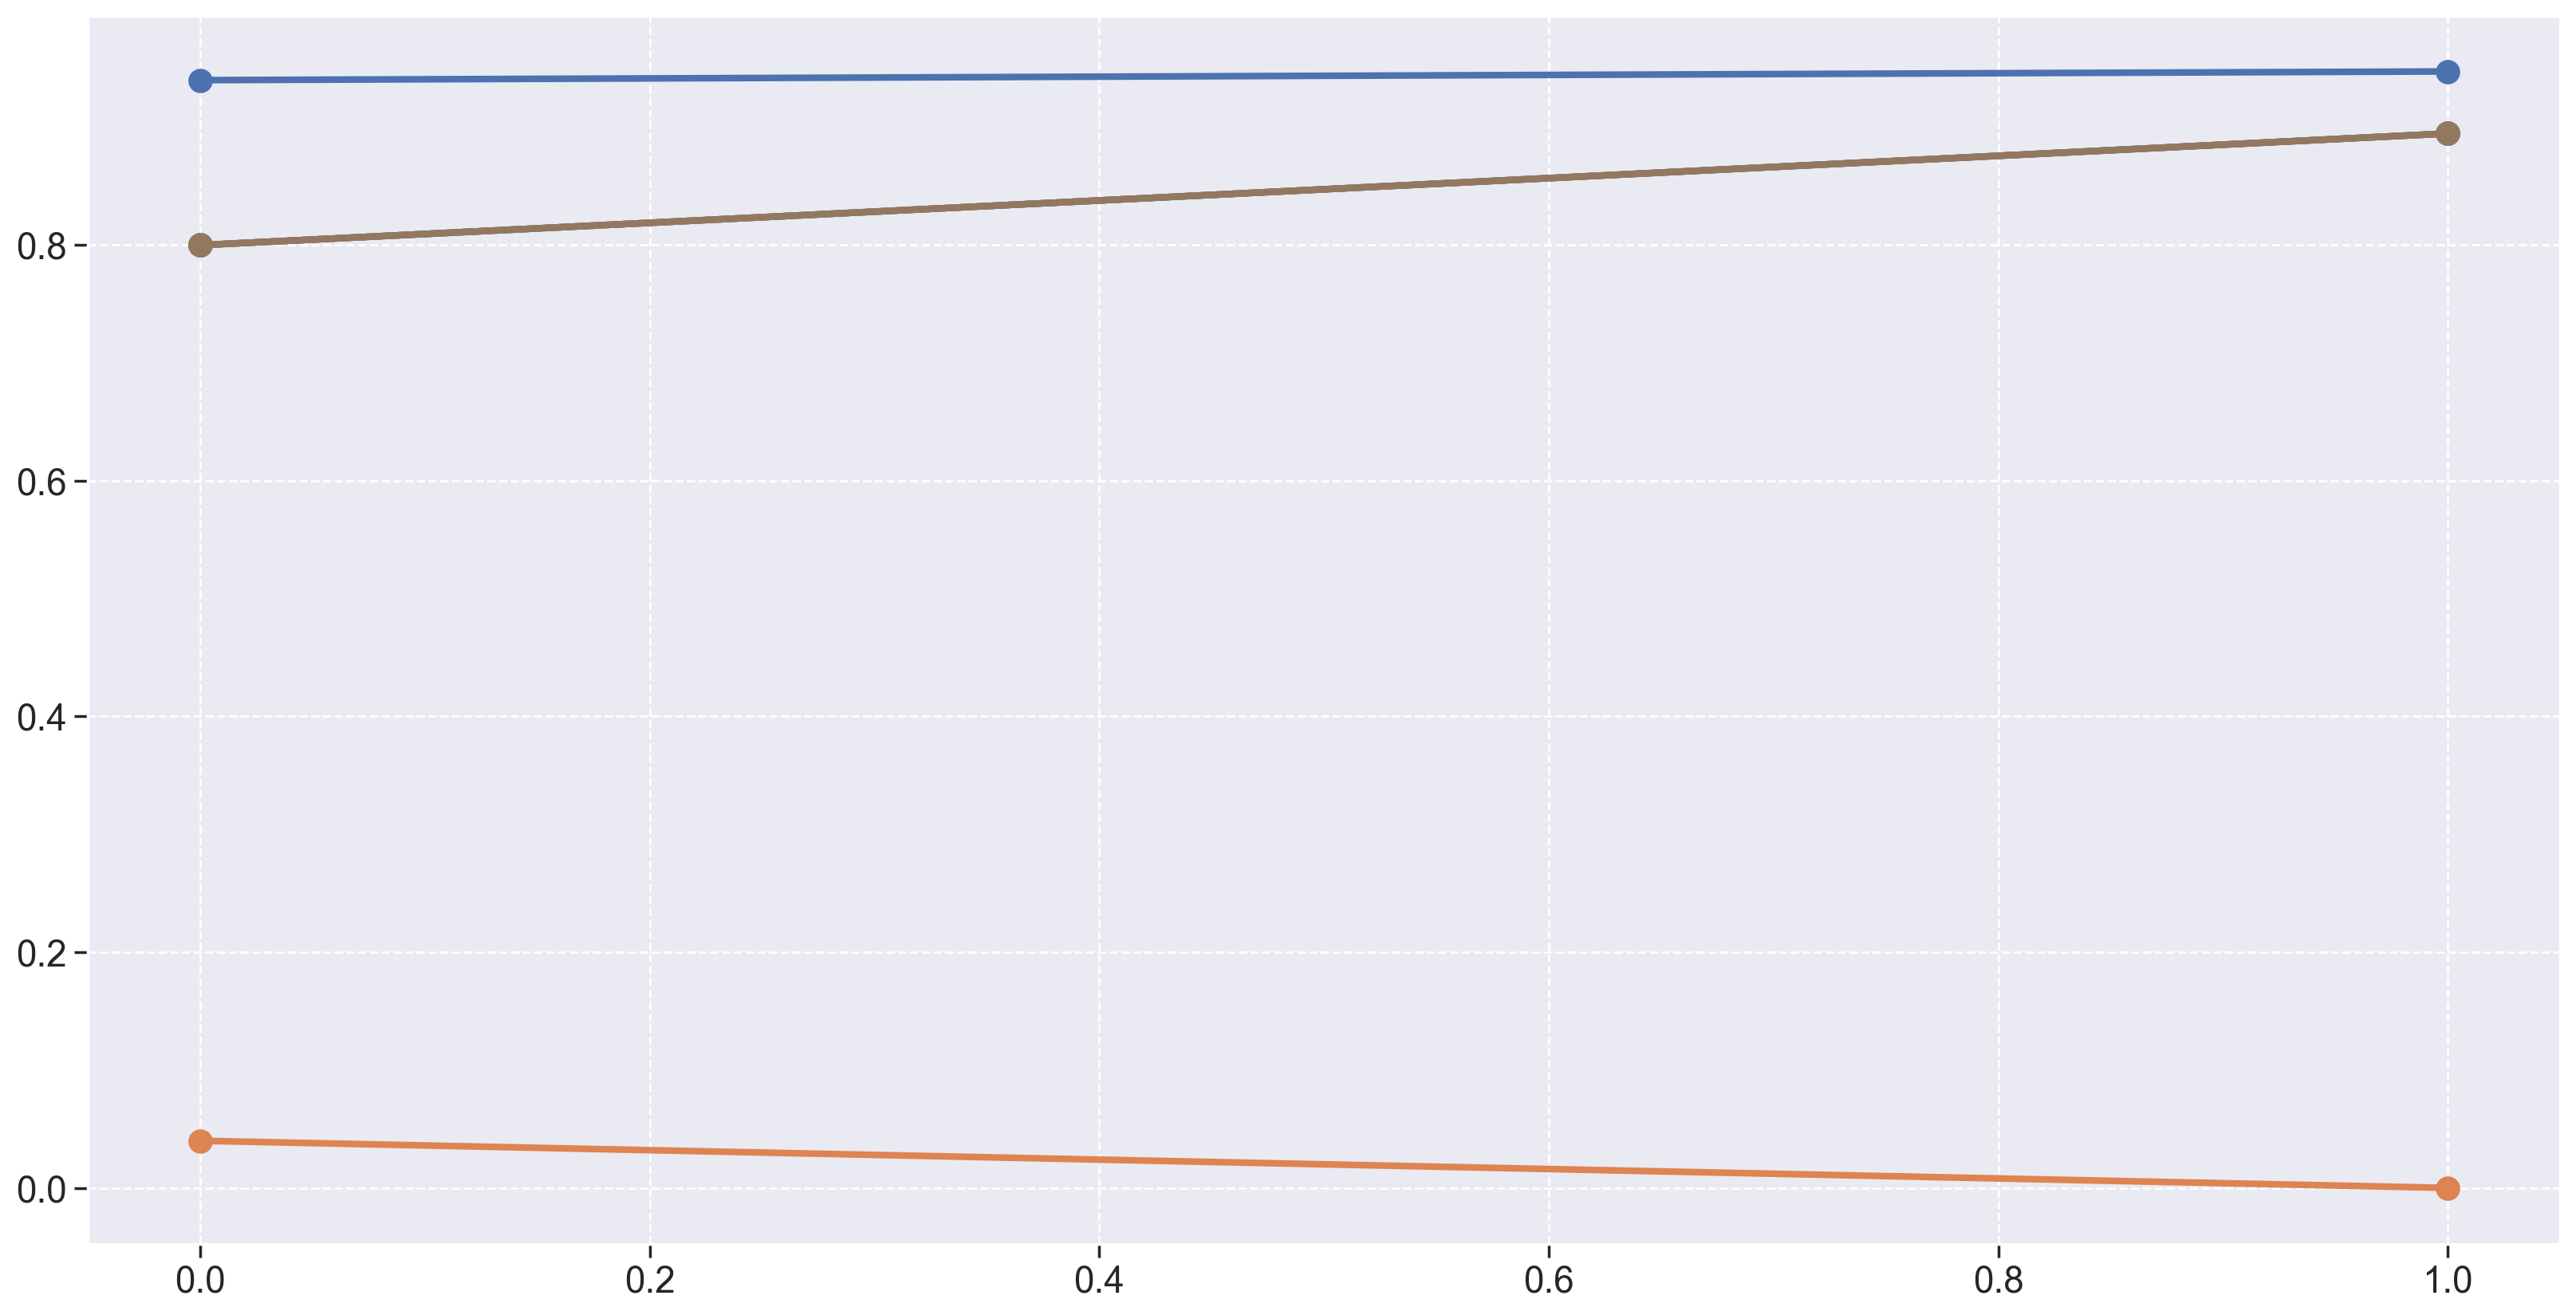

In [200]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo2_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m6'], linewidth=3, marker='o', markersize=10)


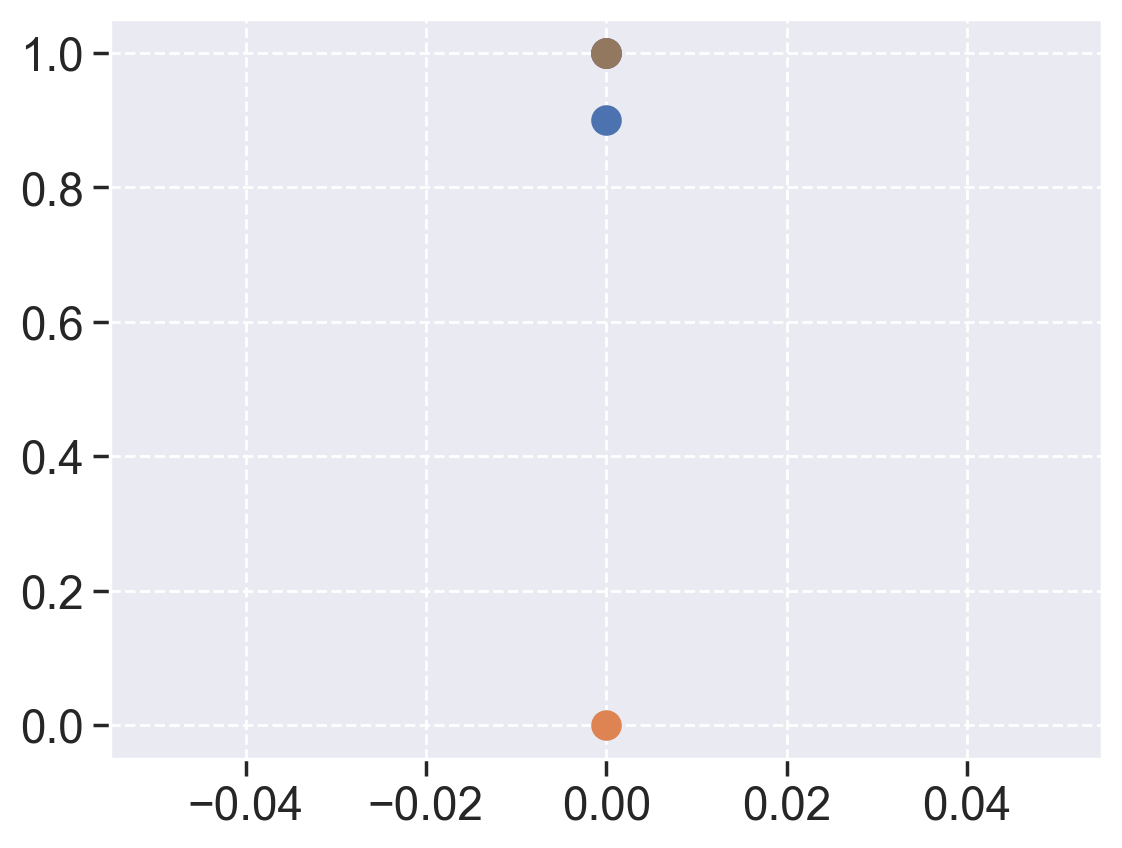

In [201]:

plt.plot(repo3_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m6'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [202]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5

repo1 = repo1_metrics
repo2 = repo2_metrics
repo3 = repo3_metrics
repo1['code_quality'] = ((repo1['m1']*pm1) + (repo1['m2']*pm2) + (repo1['m3']*pm3)) * psc1
repo2['code_quality'] = ((repo2['m1']*pm1) + (repo2['m2']*pm2) + (repo2['m3']*pm3)) * psc1
repo3['code_quality'] = ((repo3['m1']*pm1) + (repo3['m2']*pm2) + (repo3['m3']*pm3)) * psc1

repo1['testing_status'] = ((repo1['m4']*pm4) + (repo1['m5']*pm5) + (repo1['m6']*pm6)) * psc2
repo2['testing_status'] = ((repo2['m4']*pm4) + (repo2['m5']*pm5) + (repo2['m6']*pm6)) * psc2
repo3['testing_status'] = ((repo3['m4']*pm4) + (repo3['m5']*pm5) + (repo3['m6']*pm6)) * psc2

Ellipsis

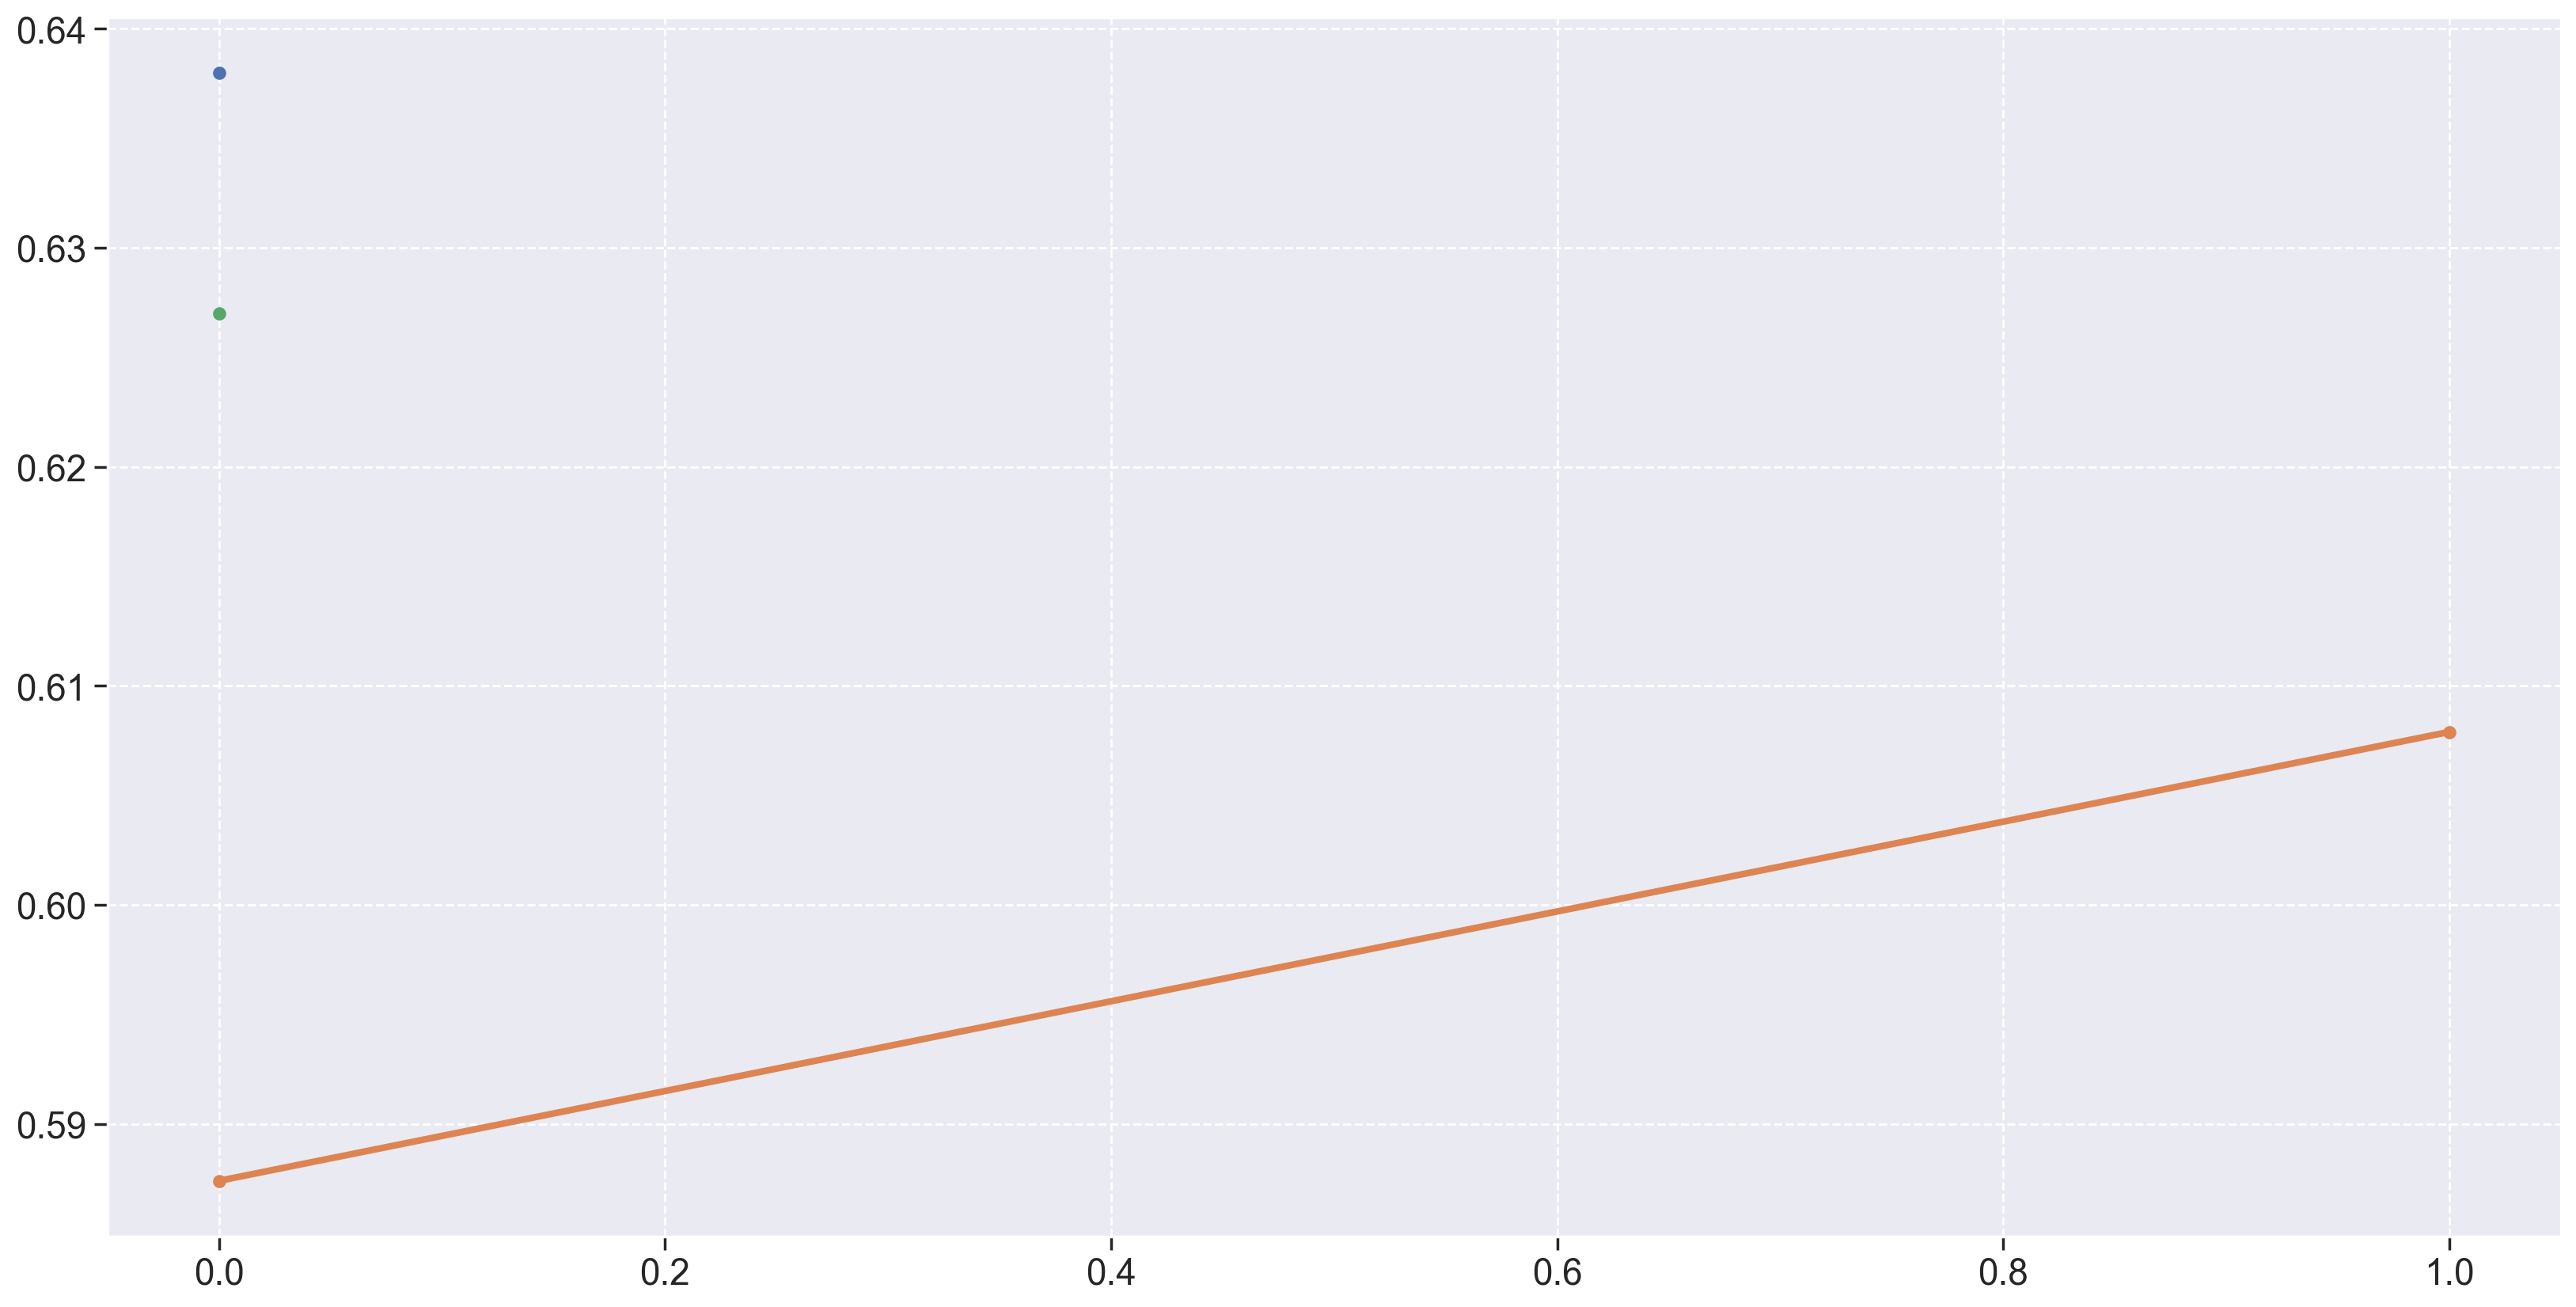

In [203]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3['code_quality'], linewidth=3, marker='o', markersize=5)
...

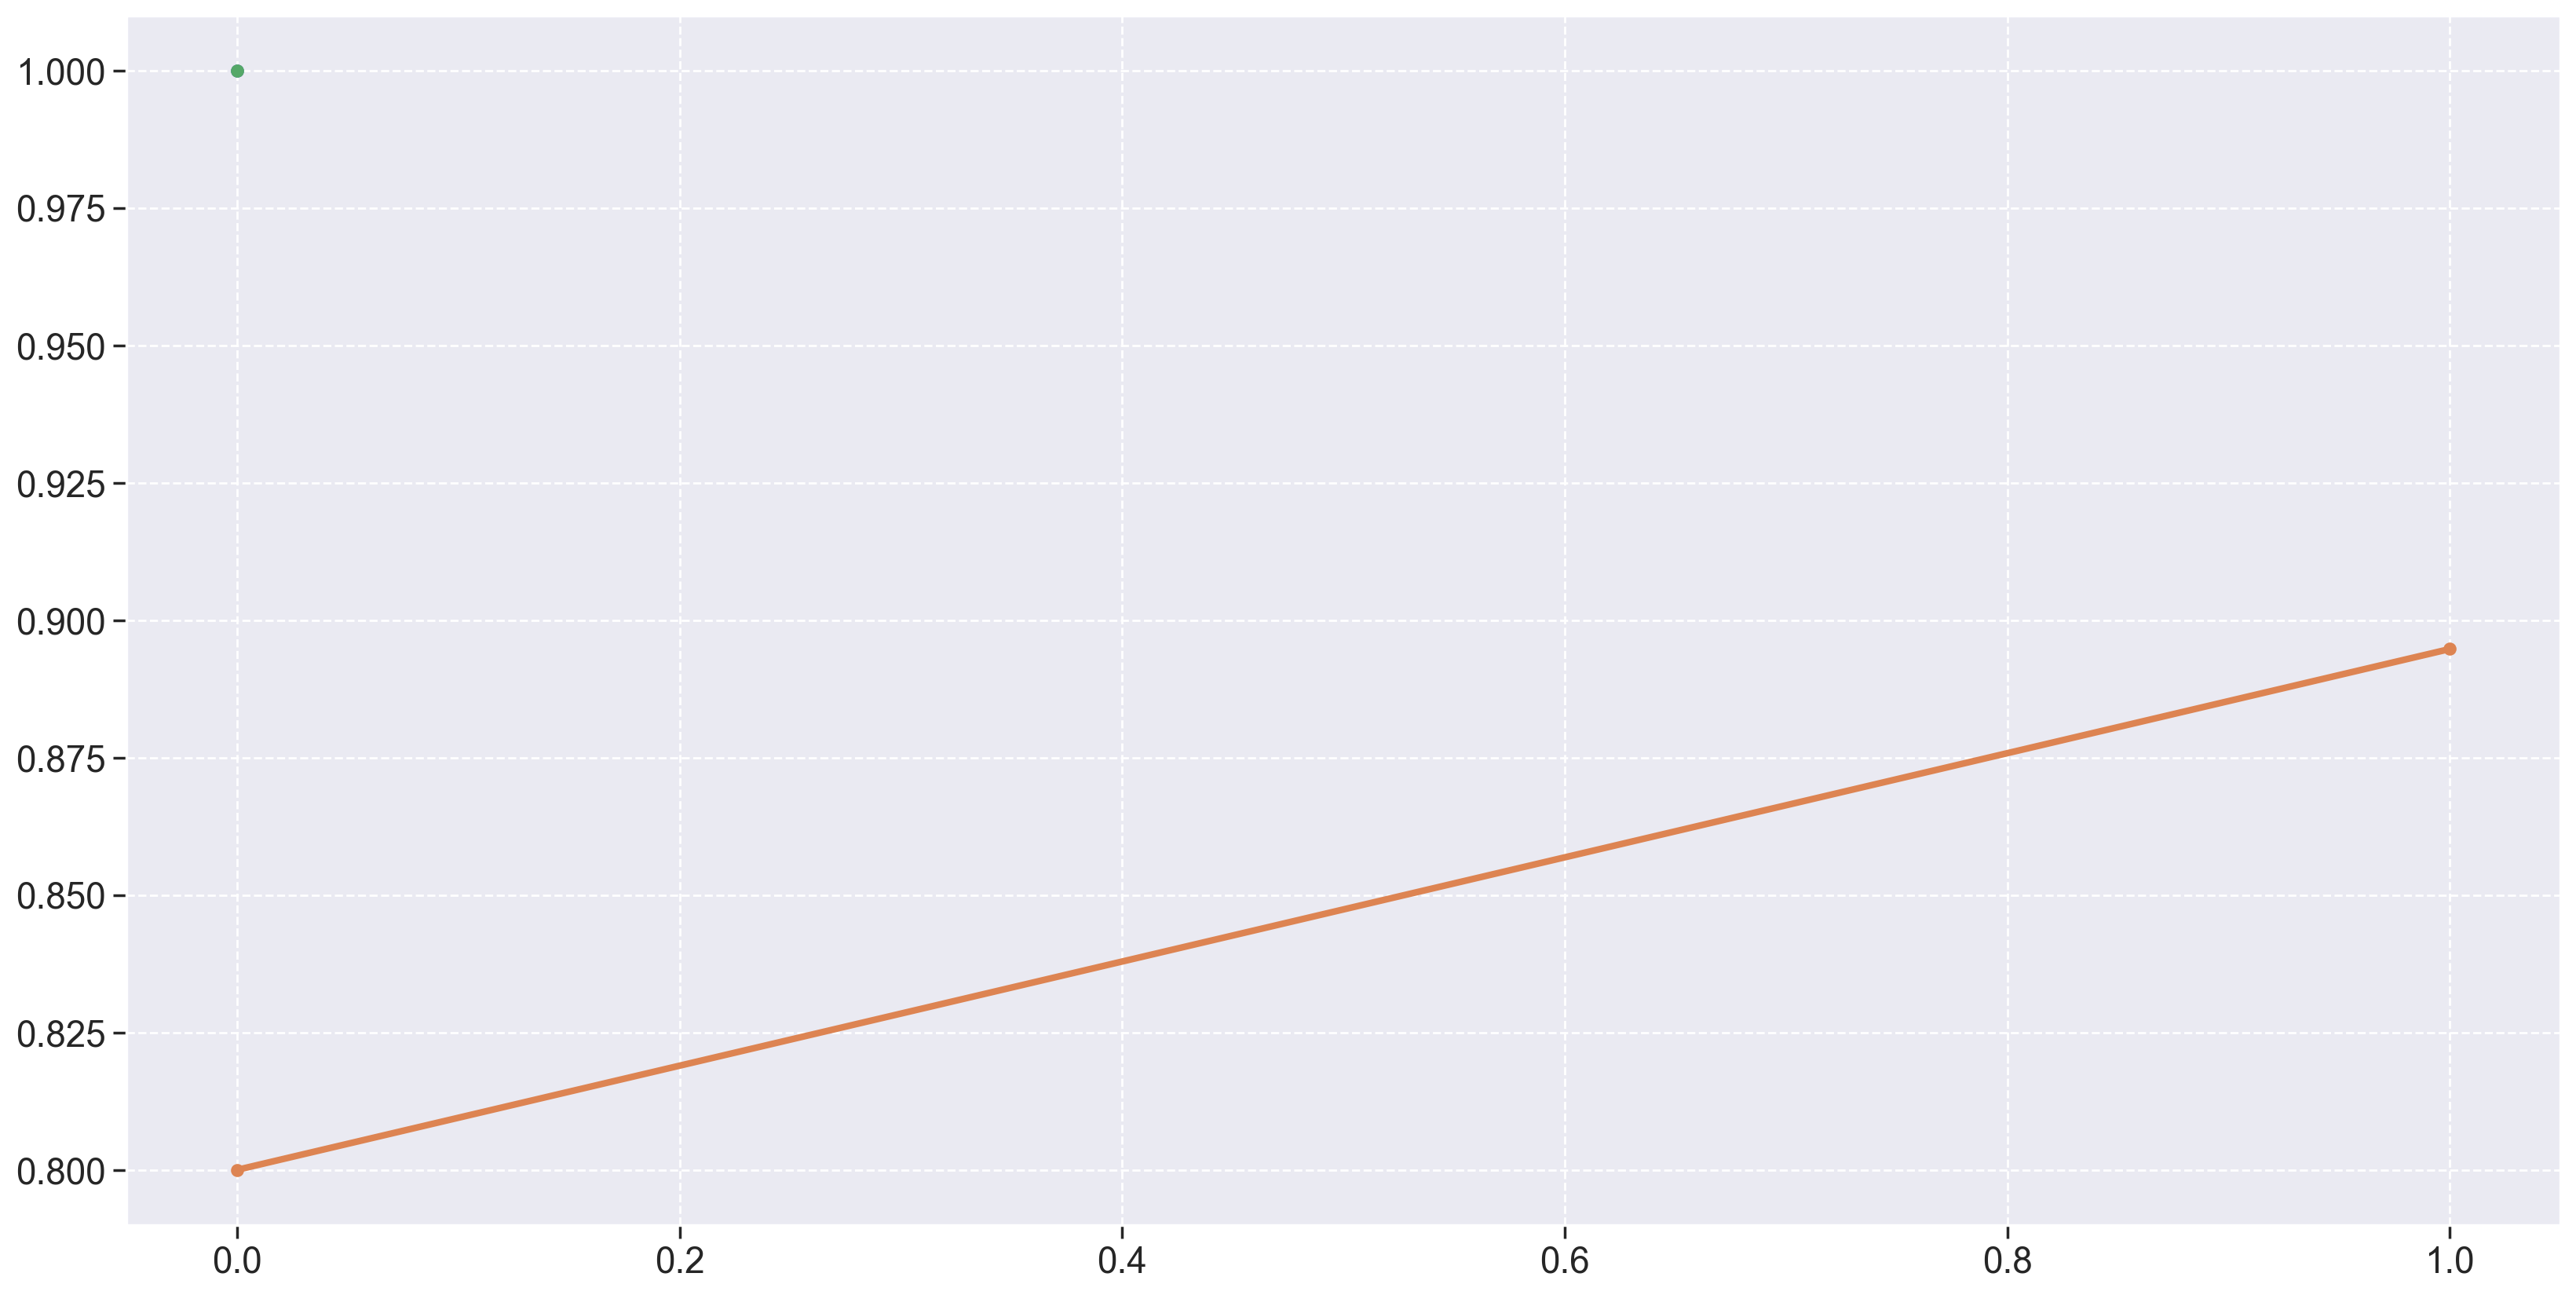

In [204]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3['testing_status'], linewidth=3, marker='o', markersize=5)



In [205]:
metrics_df = pd.concat([repo1_metrics, repo2_metrics, repo3_metrics], ignore_index=True)

metrics_df['Maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['Maintainability'] + metrics_df['Reliability']

In [206]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.933333,0.00,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,518,0.638000,1.000000,0.319000,0.500000,0.819000
1,0.940000,0.04,0.800000,0.800000,0.800000,0.800000,fga-eps-mds-2022-1-schedula-front,1.0.0,3301,0.587400,0.800000,0.293700,0.400000,0.693700
2,0.947368,0.00,0.894737,0.894737,0.894737,0.894737,fga-eps-mds-2022-1-schedula-front,1.1.1,1070,0.607895,0.894737,0.303947,0.447368,0.751316
3,0.900000,0.00,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.0,444,0.627000,1.000000,0.313500,0.500000,0.813500


(0.45, 0.7)

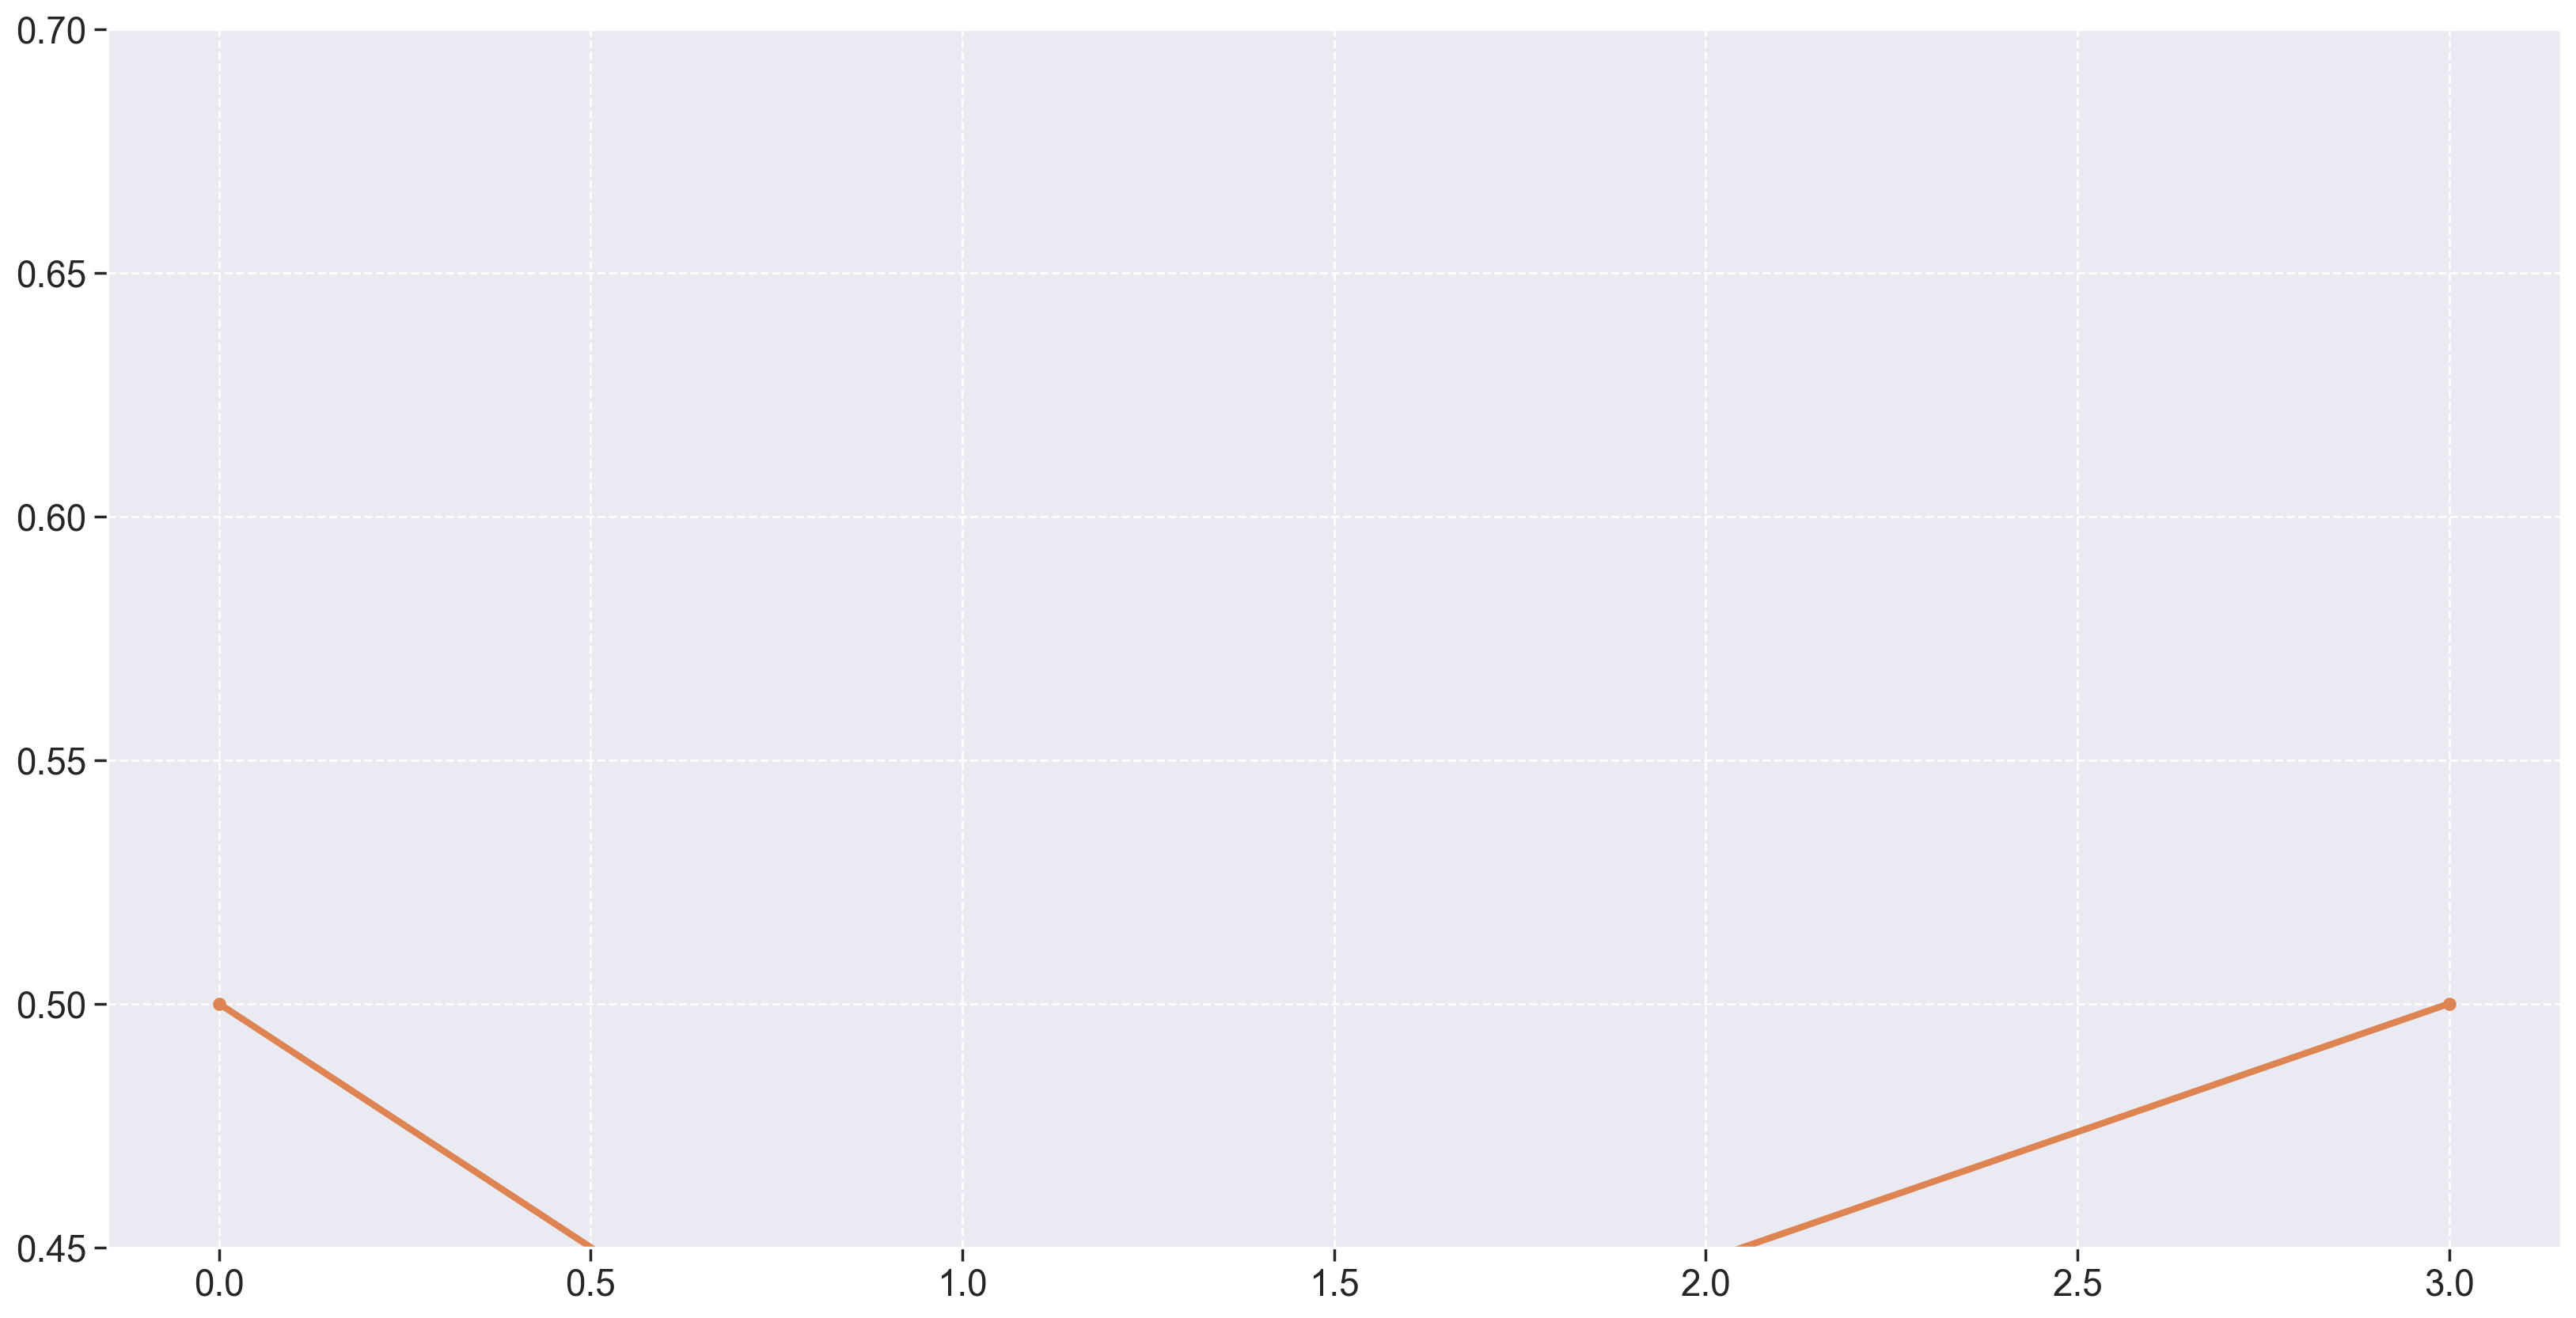

In [207]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5)

plt.ylim(.45,.7)

### You must do the total plot and the statics analysis for the repository with more versions.

In [208]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.933333,0.00,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,518,0.638000,1.000000,0.319000,0.500000,0.819000
1,0.940000,0.04,0.800000,0.800000,0.800000,0.800000,fga-eps-mds-2022-1-schedula-front,1.0.0,3301,0.587400,0.800000,0.293700,0.400000,0.693700
2,0.947368,0.00,0.894737,0.894737,0.894737,0.894737,fga-eps-mds-2022-1-schedula-front,1.1.1,1070,0.607895,0.894737,0.303947,0.447368,0.751316
3,0.900000,0.00,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.0,444,0.627000,1.000000,0.313500,0.500000,0.813500


In [209]:
# Building descriptive statistics dataframe

more_versions_repo = metrics_df

def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

maintainability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Maintainability"]),
                                    columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])
reliability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Reliability"]),
                                columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

In [210]:
print(maintainability_stats)

       mean      mode    median       std       var     min    max
0  0.307537  0.293700  0.308724  0.011125  0.000124  0.2937  0.319
1  0.307537  0.303947  0.308724  0.011125  0.000124  0.2937  0.319
2  0.307537  0.313500  0.308724  0.011125  0.000124  0.2937  0.319
3  0.307537  0.319000  0.308724  0.011125  0.000124  0.2937  0.319


In [211]:
print(reliability_stats)

       mean  mode    median       std       var  min  max
0  0.461842   0.5  0.473684  0.048118  0.002315  0.4  0.5


In [212]:
### Plotting the aggregated quality characteristc indicator

{'whiskers': [<matplotlib.lines.Line2D at 0x241d6515900>,
 'caps': [<matplotlib.lines.Line2D at 0x241d6515ea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241d65157b0>,
 'medians': [<matplotlib.lines.Line2D at 0x241d6516440>,
 'fliers': [<matplotlib.lines.Line2D at 0x241d6516710>,
 'means': []}

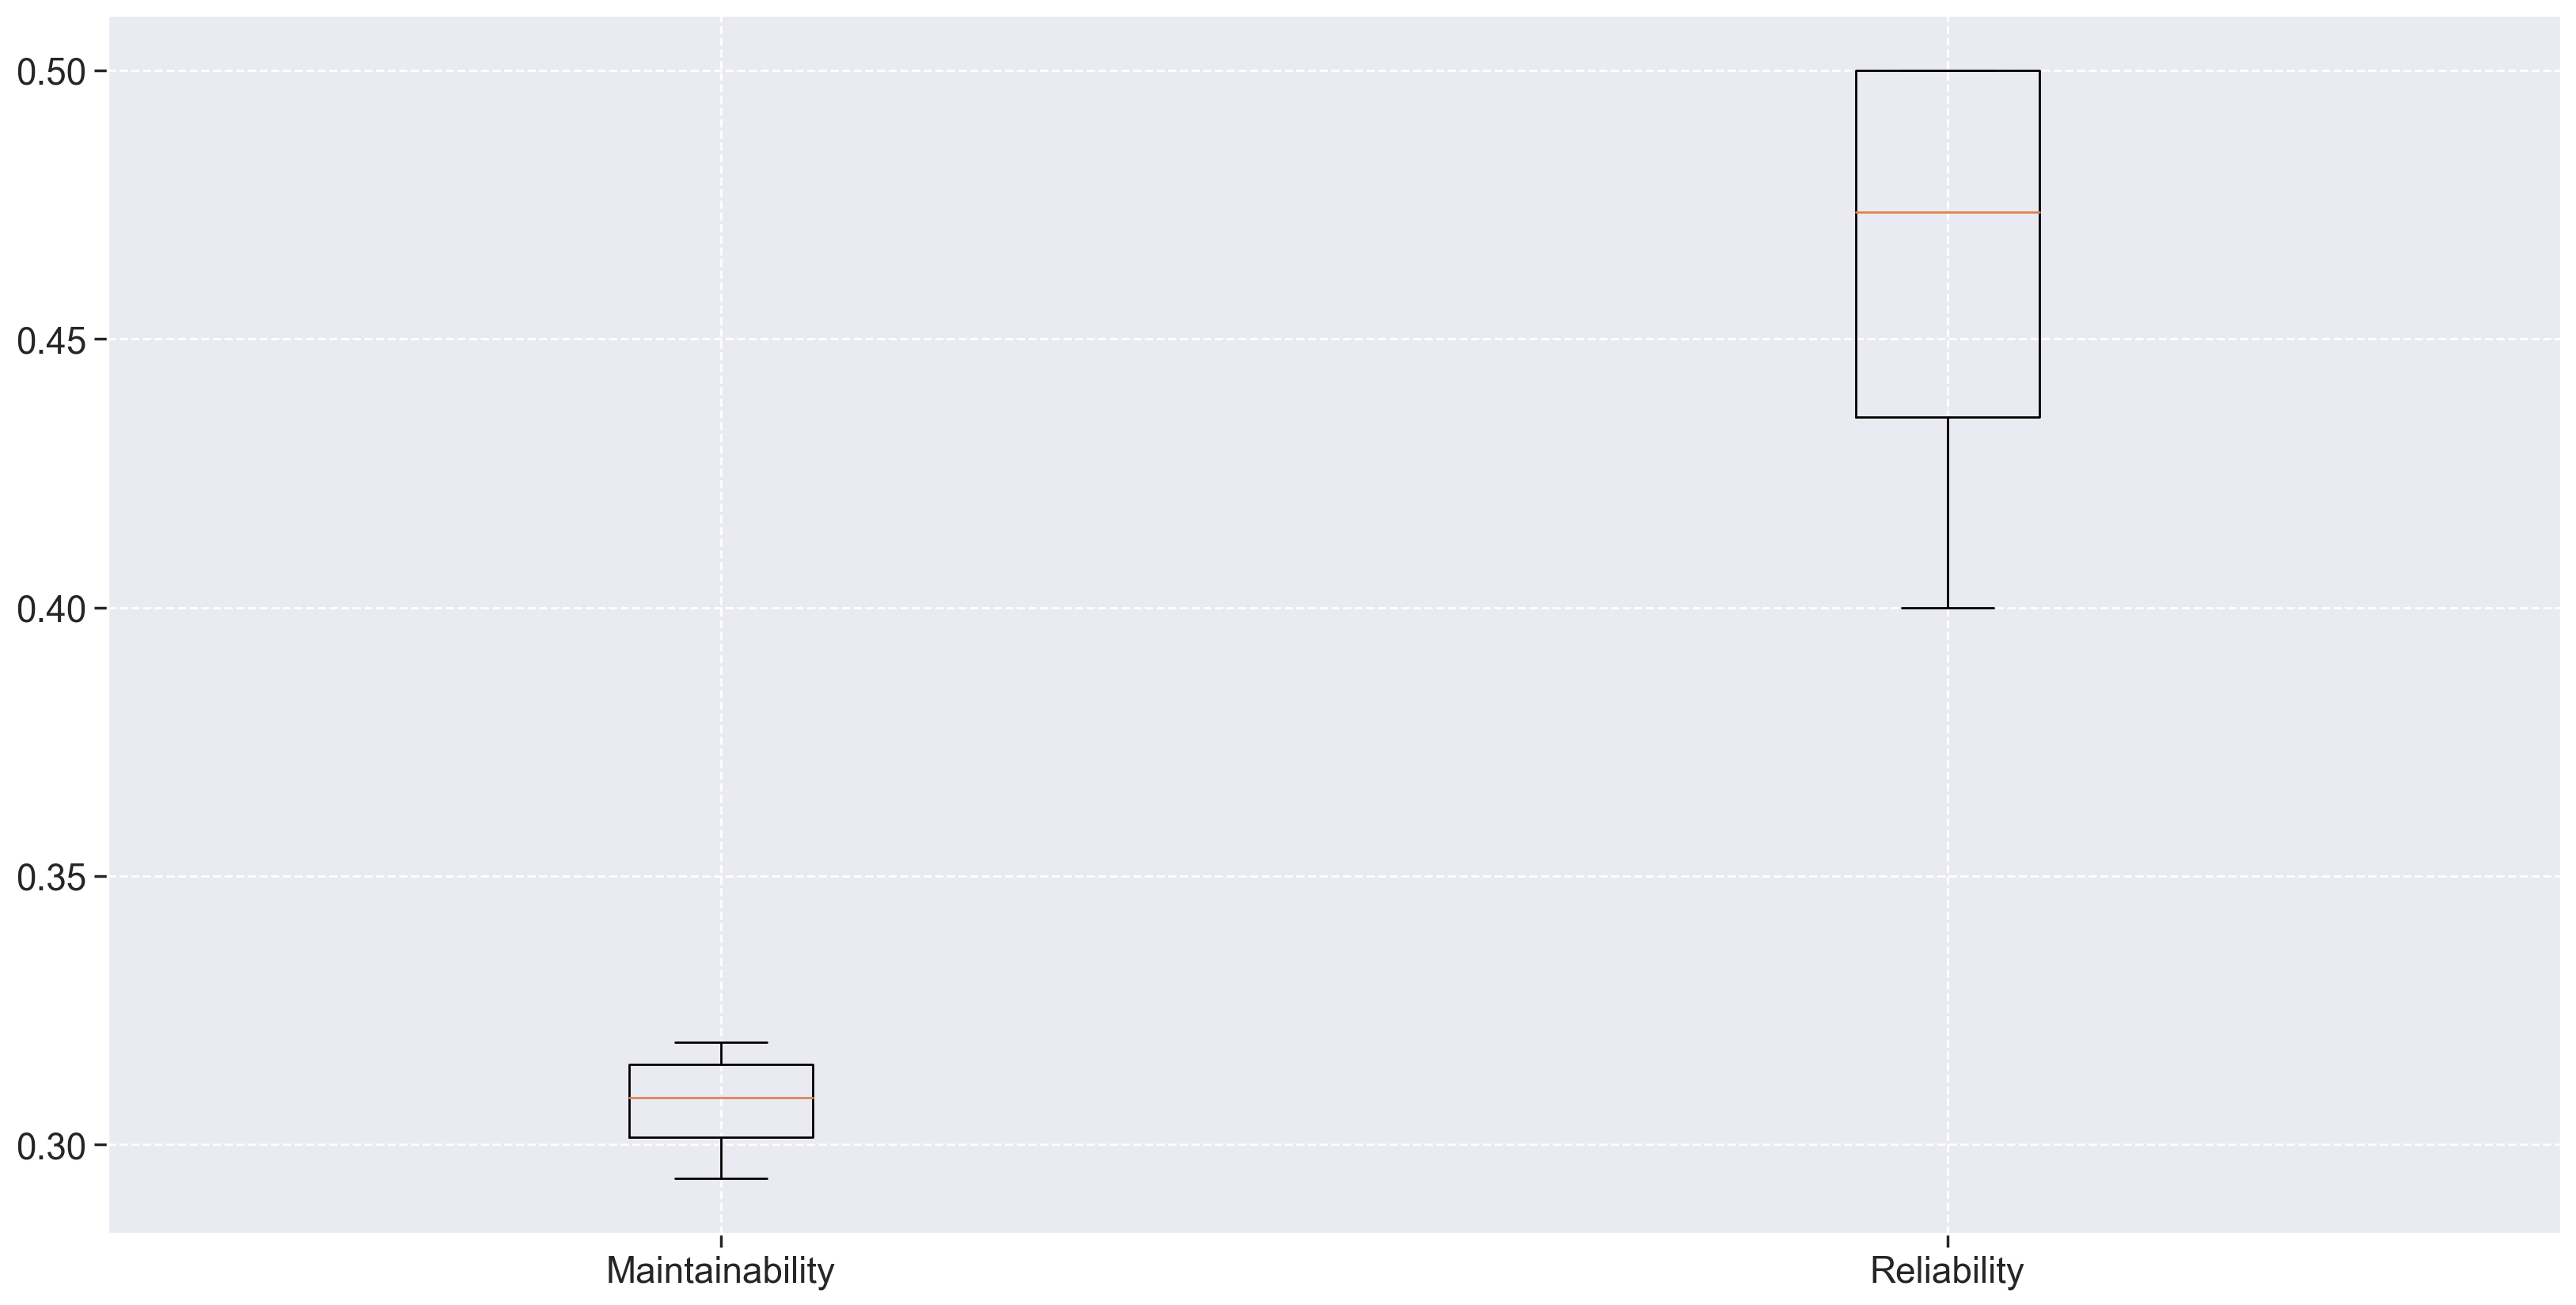

In [213]:
plt.figure(figsize=(20, 10))

# boxplot
plt.boxplot([more_versions_repo['Maintainability'], more_versions_repo['Reliability']],
labels=['Maintainability', 'Reliability'])

### Plotting the aggregated repository quality indicator

In [214]:
repo1

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status
0,0.933333,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,518,0.638,1.0


In [215]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['more_versions_repo']['total'], linewidth=3, marker='o', markersize=5)

plt.ylim(.45,.7)


KeyError: 'more_versions_repo'

<Figure size 2000x1000 with 0 Axes>

In [ ]:
### Outputting quality measures and indicator to csv, and xlsx files

In [232]:
import sys


sys.path

['c:\\Users\\samue\\Área de Trabalho\\UnBe\\Disciplinas\\EPS\\2022-1-schedula-doc',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\samue\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

In [251]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
import os
currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
  
metrics_df.to_excel(f'./data/fga-eps-mds-2022-1-schedula-{currentDateTime}.xlsx', index = False)

metrics_df.to_csv(f'./data/fga-eps-mds-2022-1-schedula-{currentDateTime}.csv', index = False)
